In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.cluster import KMeansClusterer,cosine_distance,euclidean_distance
from sklearn import metrics
from sklearn import mixture
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import nltk
import re
import random
import emoji
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
nltk.download ('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     远程主机强迫关闭了一个现有的连接。>


False

In [4]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
# tfidf = TfidfVectorizer(max_features=1000)
# # train['vector']=vectorizer.fit_transform(train['item_name'])
# # train=train.drop('item_name',axis=1)
# label = train['is_misinfo']
# train_text = tfidf.fit_transform(train['text content'])

# train_data = train_text
# train_label = label
# label_test = test['is_misinfo']
# test_text = tfidf.fit_transform(test['text content'])
# test_label = label_test
# y=train.category_id
# train=train.drop('category_id',axis=1)
# X_train, X_test, y_train, y_test = train_test_split(train,y, test_size=0.10,stratify=y,random_state=42)

# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(train_data, test_text)

In [ ]:
from copy import deepcopy

#array manipulations
import numpy as np

#dataframe and its manipulations
import pandas as pd

#plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#selected plotting functions
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

#classes for grid search and cross-validation, function for splitting data and evaluating models
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve

#XGBoost library
import xgboost as xgb
import time
import warnings

In [22]:
train = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_train.csv")
test = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_misinfo    10200 non-null  int64 
 1   text content  10200 non-null  object
dtypes: int64(1), object(1)
memory usage: 159.5+ KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_misinfo    2551 non-null   int64 
 1   text content  2551 non-null   object
dtypes: int64(1), object(1)
memory usage: 40.0+ KB


In [26]:
X_train = train['text content']
X_test = train['is_misinfo']
y_train = test['text content']
y_test = test['is_misinfo']
print (X_train)

0        uhg time to get my second vaccine i hope i don...
1        New censorship! Twitter says it may be mislead...
2        If you’ve had a COVID- vaccine, it’s thanks in...
3        Got my second vaccine. Can't wait to still wea...
4        Post-second vaccine symptoms description: like...
                               ...                        
10195    I’m getting my first round of the COVID vaccin...
10196    "We are an elite club. We do not wish to be, b...
10197    Why do they keep calling it a vaccine? Its an ...
10198    Many dying in Israel following the experimenta...
10199    Had my #vaccine   even got a sticker. Very wel...
Name: text content, Length: 10200, dtype: object


In [32]:
# import pandas as pd
# import numpy as np
# from fuzzywuzzy import fuzz, process
# import re
# import itertools
# from typing import Union, List, Tuple
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.neighbors import NearestNeighbors
 
# import time
# def preprocess_string(s):
#     s = re.sub(r'(?<=\b\w)\s*[ &]\s*(?=\w\b)', '', s)
#     return s
 
# # 字符串匹配- TF-IDF
# def build_vectorizer(
#     clean: pd.Series,
#     analyzer: str = 'char', 
#     ngram_range: Tuple[int, int] = (1, 4), 
#     n_neighbors: int = 1, 
#     **kwargs
#     ) -> Tuple:
#     vectorizer = TfidfVectorizer(analyzer = analyzer, ngram_range = ngram_range, **kwargs)
#     X = vectorizer.fit_transform(clean.values.astype('U'))

#     nbrs = NearestNeighbors(n_neighbors = n_neighbors, metric = 'cosine').fit(X)
#     return vectorizer, nbrs
 
# def tfidf_nn(
#     messy, 
#     clean, 
#     n_neighbors = 1, 
#     **kwargs
#     ):
#     vectorizer, nbrs = build_vectorizer(clean, n_neighbors = n_neighbors, **kwargs)
#     input_vec = vectorizer.transform(messy)
 
#     distances, indices = nbrs.kneighbors(input_vec, n_neighbors = n_neighbors)
#     nearest_values = np.array(clean)[indices]
#     return nearest_values, distances
 
# def find_matches_fuzzy(
#     row, 
#     match_candidates, 
#     limit = 5
#     ):
#     row_matches = process.extract(
#         row, dict(enumerate(match_candidates)), 
#         scorer = fuzz.token_sort_ratio, 
#         limit = limit
#         )
#     result = [(row, match[0], match[1]) for match in row_matches]
#     return result
 
# def fuzzy_nn_match(
#     messy,
#     clean,
#     column,
#     col,
#     n_neighbors = 100,
#     limit = 5, **kwargs):
#     nearest_values, _ = tfidf_nn(messy, clean, n_neighbors, **kwargs)
 
#     results = [find_matches_fuzzy(row, nearest_values[i], limit) for i, row in enumerate(messy)]
#     df = pd.DataFrame(itertools.chain.from_iterable(results),
#         columns = [column, col, 'Ratio']
#         )
#     return df
 
# def fuzzy_tf_idf(
#     df: pd.DataFrame,
#     column: str,
#     clean: pd.Series,
#     mapping_df: pd.DataFrame,
#     col: str,
#     analyzer: str = 'char',
#     ngram_range: Tuple[int, int] = (1, 3)
#     ) -> pd.Series:
#     clean = clean.drop_duplicates().reset_index(drop = True)
#     messy_prep = df[column].drop_duplicates().dropna().reset_index(drop = True).astype(str)
#     messy = messy_prep.apply(preprocess_string)
#     result = fuzzy_nn_match(messy = messy, clean = clean, column = column, col = col, n_neighbors = 1)
#     return result


In [41]:
df = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_train.csv")
Vax_data = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Misinfodata_Twitter.csv")

In [11]:
train = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_train.csv")
test = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_test.csv")
# X_train = train['text content']
# X_test = test['is_misinfo']
# y_train = train['text content']
# y_test = test['is_misinfo']
# X_train = [str (item) for item in X_train]
# y_train = [str (item) for item in y_train]
Tweet = pd.concat([train, test])
Tweet
X = Tweet['text content']
y = Tweet['is_misinfo']

,is_misinfo,text content
0,0,uhg time to get my second vaccine i hope i don...
1,1,New censorship! Twitter says it may be mislead...
2,1,"If you’ve had a COVID- vaccine, it’s thanks in..."
3,0,Got my second vaccine. Can't wait to still wea...
4,0,Post-second vaccine symptoms description: like...
...,...,...
2546,0,yay mak getting vaccine todayy
2547,0,I had the incredible privilege of receiving th...
2548,0,Got my first dose of vaccine \n#vaccinated #...
2549,1,We still have no long term evidence of impact ...


In [18]:
train = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_train.csv")
test = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_test.csv")
X_train = train['text content']
X_test = test['is_misinfo']
y_train = train['text content']
y_test = test['is_misinfo']
X_train = [str (item) for item in X_train]
y_train = [str (item) for item in y_train]


In [49]:
df = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/all_tweet.csv")
X = df['text content']
y = df['is_misinfo']
X = [str (item) for item in X]
y = [str (item) for item in y]

In [38]:
train = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_train.csv")
test = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/Tweet_test.csv")
print (len(train)+len(test))
print (len(train))
print (train.iloc[10199,0])


12751
10200
0


In [40]:
# for i in range(len(test)):
#     all_tweet.iloc[10200+i,0] = test.iloc[i,0]
#     all_tweet.iloc[10200+i,1] = test.iloc[i,1]
all_tweet = train.append(test, ignore_index = True)

In [41]:
all_tweet

,is_misinfo,text content
0,0,uhg time to get my second vaccine i hope i don...
1,1,New censorship! Twitter says it may be mislead...
2,1,"If you’ve had a COVID- vaccine, it’s thanks in..."
3,0,Got my second vaccine. Can't wait to still wea...
4,0,Post-second vaccine symptoms description: like...
...,...,...
12746,0,yay mak getting vaccine todayy
12747,0,I had the incredible privilege of receiving th...
12748,0,Got my first dose of vaccine \n#vaccinated #...
12749,1,We still have no long term evidence of impact ...


In [42]:
all_tweet.to_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/all_tweet.csv",index = False)

In [57]:
import string
string.punctuation
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
all_tweet = pd.read_csv("C:/Users/Kelvin/Desktop/Assignment/2022Spring/BIA660/all_tweet.csv")


In [102]:
Tweet = all_tweet
Tweet.sort_values(by="is_misinfo" , inplace=True, ascending=True)
Tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12751 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_misinfo    12751 non-null  int64 
 1   text content  12751 non-null  object
dtypes: int64(1), object(1)
memory usage: 298.9+ KB


In [103]:
F = Tweet[0:8315]
F

,is_misinfo,text content
0,0,uhg time to get my second vaccine i hope i don...
7581,0,"if you eat burger king, you don’t gotta worry ..."
7583,0,Ok @w_white the vaccine wasn’t why you were ex...
7584,0,Another great day at Vaccine Clinic today. Alw...
7585,0,Vaccine clinic day started time to cry
...,...,...
679,0,Great to get my second AstraZenaca vaccine yes...
3761,0,Please get vaccinated. Millions already have! ...
4000,0,About to get my vaccine yall!
3760,0,"Dear #antivaxxers, your refused vaccine is now..."


In [104]:
F_clean = F['text content'].apply(message_cleaning)

In [111]:

A = []
for i in range(len(F_clean)):
    A.append(F_clean.iloc[i])
A

[['uhg',
  'time',
  'get',
  'second',
  'vaccine',
  'hope',
  'don’t',
  'DIE',
  'like',
  'don’t',
  'want',
  'sit',
  'bed',
  'alone',
  'feel',
  'like',
  'complete',
  'ass',
  'day',
  'uhg'],
 ['eat', 'burger', 'king', 'don’t', 'gotta', 'worry', 'what’s', 'vaccine'],
 ['Ok',
  'wwhite',
  'vaccine',
  'wasn’t',
  'excitedso',
  'let’s',
  'hear',
  'know',
  'there’s',
  'good',
  'news',
  'somewhere'],
 ['Another',
  'great',
  'day',
  'Vaccine',
  'Clinic',
  'today',
  'Always',
  'incredible',
  'experience',
  'grateful',
  'opportunity',
  'make',
  'a…'],
 ['Vaccine', 'clinic', 'day', 'started', 'time', 'cry'],
 ['gonna', 'get', 'first', 'vaccine', 'next', 'mondayy', 'excited', 'tbh'],
 ['get',
  'blended',
  'drinks',
  'Dunkin',
  'don’t',
  'need',
  'worry',
  'what’s',
  'covid',
  'vaccine'],
 ['Scheduled',
  'second',
  'dose',
  'moderna',
  'Friday',
  'night',
  'won’t',
  'use',
  'PTO',
  'makes',
  'sick',
  'bc',
  'don’t',
  'ge…'],
 ['covid',
  'va

In [59]:

tweets_df_clean = all_tweet['text content'].apply(message_cleaning)

In [61]:
print(tweets_df_clean)

0        [uhg, time, get, second, vaccine, hope, don’t,...
1        [New, censorship, Twitter, says, may, misleadi...
2        [you’ve, COVID, vaccine, it’s, thanks, part, c...
3        [Got, second, vaccine, Cant, wait, still, wear...
4        [Postsecond, vaccine, symptoms, description, l...
                               ...                        
12746                 [yay, mak, getting, vaccine, todayy]
12747    [incredible, privilege, receiving, covidvaccin...
12748    [Got, first, dose, vaccine, vaccinated, NFTart...
12749    [still, long, term, evidence, impact, vaccine,...
12750    [gonna, get, first, jab, vaccine, saturday, im...
Name: text content, Length: 12751, dtype: object


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(all_tweet['text content']).toarray()

In [1]:
x = tweets_countvectorizer
y = all_tweet['is_misinfo']
x

NameError: name 'tweets_countvectorizer' is not defined

# Model Comparison

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) 

In [68]:
NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
y_predict_test = NB_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)

In [73]:
print("Naive Bayes:\n ",classification_report(y_test, y_predict_test))

Naive Bayes:
                precision    recall  f1-score   support

           0       0.96      0.96      0.96      1718
           1       0.91      0.92      0.92       833

    accuracy                           0.94      2551
   macro avg       0.94      0.94      0.94      2551
weighted avg       0.94      0.94      0.94      2551



In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# def cluster_kmean(train_text, test_text, test_label):
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(x, y, random_state = 0, test_size = 0.2) 
classfier = LogisticRegression()

classfier.fit(X_train, y_train)   
y_predict_test = classfier.predict(x_test)
cm = confusion_matrix(y_test, classfier.predict(X_test))
print(classification_report(y_test, classfier.predict(X_test)))
#     clusters = clusterer.cluster(dtm.toarray(), assign_clusters=True)
# print("Logistic Regression:\n ",classification_report(y_test, y_predict_test))


LogisticRegression()

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1691
           1       0.92      0.87      0.89       860

    accuracy                           0.93      2551
   macro avg       0.93      0.91      0.92      2551
weighted avg       0.93      0.93      0.93      2551



In [86]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

C:\Users\Kelvin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
cm = confusion_matrix(y_test, XGB.predict(X_test))
print("xgboost: \n ",classification_report(y_test, XGB.predict(X_test)))

xgboost: 
                precision    recall  f1-score   support

           0       0.94      0.94      0.94      1691
           1       0.88      0.87      0.88       860

    accuracy                           0.92      2551
   macro avg       0.91      0.91      0.91      2551
weighted avg       0.92      0.92      0.92      2551



In [12]:
t = pd.DataFrame(columns = [['Model','f1_score']])

In [13]:
t

,Model,f1_score


In [14]:
Model = ['K-means', 'Naive Bayes', 'Logistic Regression', 'Xgboost']

In [21]:
f1_score= [0.83, 0.94, 0.93, 0.92 ]

In [16]:
t

,Model,f1_score


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 864x288 with 0 Axes>

(0.8, 1.0)

<AxesSubplot:>

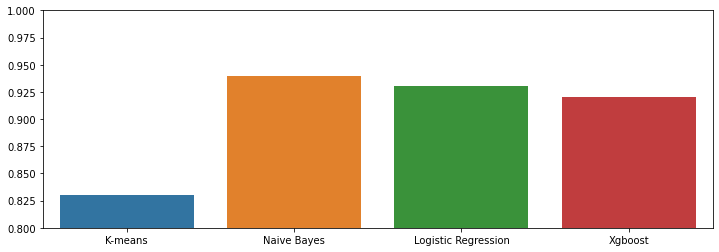

In [23]:
plt.figure(figsize =(12,4));
plt.ylim([0.8, 1]);
sns.barplot(x = Model, y = f1_score)